In [11]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Classification

In [12]:
# Read data
df = pd.read_csv('data.csv')
df.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [13]:
# Watch classifications
df['Classification'] = df['Classification'] - 1 # Convert to 0 and 1
df['Classification'].value_counts()

Classification
1    64
0    52
Name: count, dtype: int64

In [14]:
# Make data to train model
y = df['Classification'].values.reshape(-1, 1)
X = df.drop(columns=['Classification'])
print(X.shape)
print(y.shape)

(116, 9)
(116, 1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state = 42, test_size=0.1)

In [27]:
# Build tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

my_tree = DecisionTreeClassifier(max_depth=2)
my_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [28]:
# Predict in test data
y_pred = my_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[8 1]
 [0 3]]


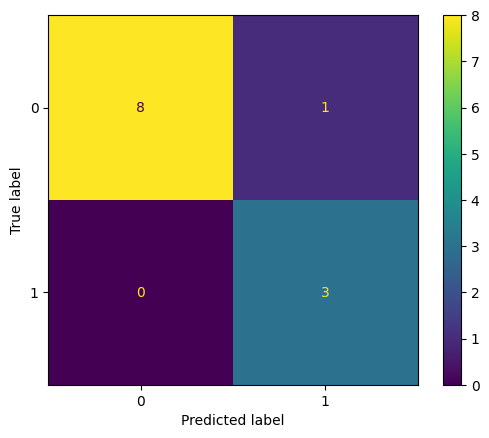

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 2. Regression

In [31]:
df = pd.read_csv('datareg.csv')
df.head(5)

,Product,Cost,Profit
0,'Asset Flip',100,1000
1,'Text Based',500,3000
2,'Visual Novel',1500,5000
3,'2D Pixel Art',3500,8000
4,'2D Vector Art',5000,6500


In [32]:
# Make data for train
X = df['Cost'].values.reshape(-1, 1)
y = df['Profit'].values.reshape(-1, 1)

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
my_tree = DecisionTreeRegressor()
my_tree.fit(X, y)

DecisionTreeRegressor()

In [36]:
X_test = [[4500]]
y_pred = my_tree.predict(X_test)
print(y_pred)

[6500.]


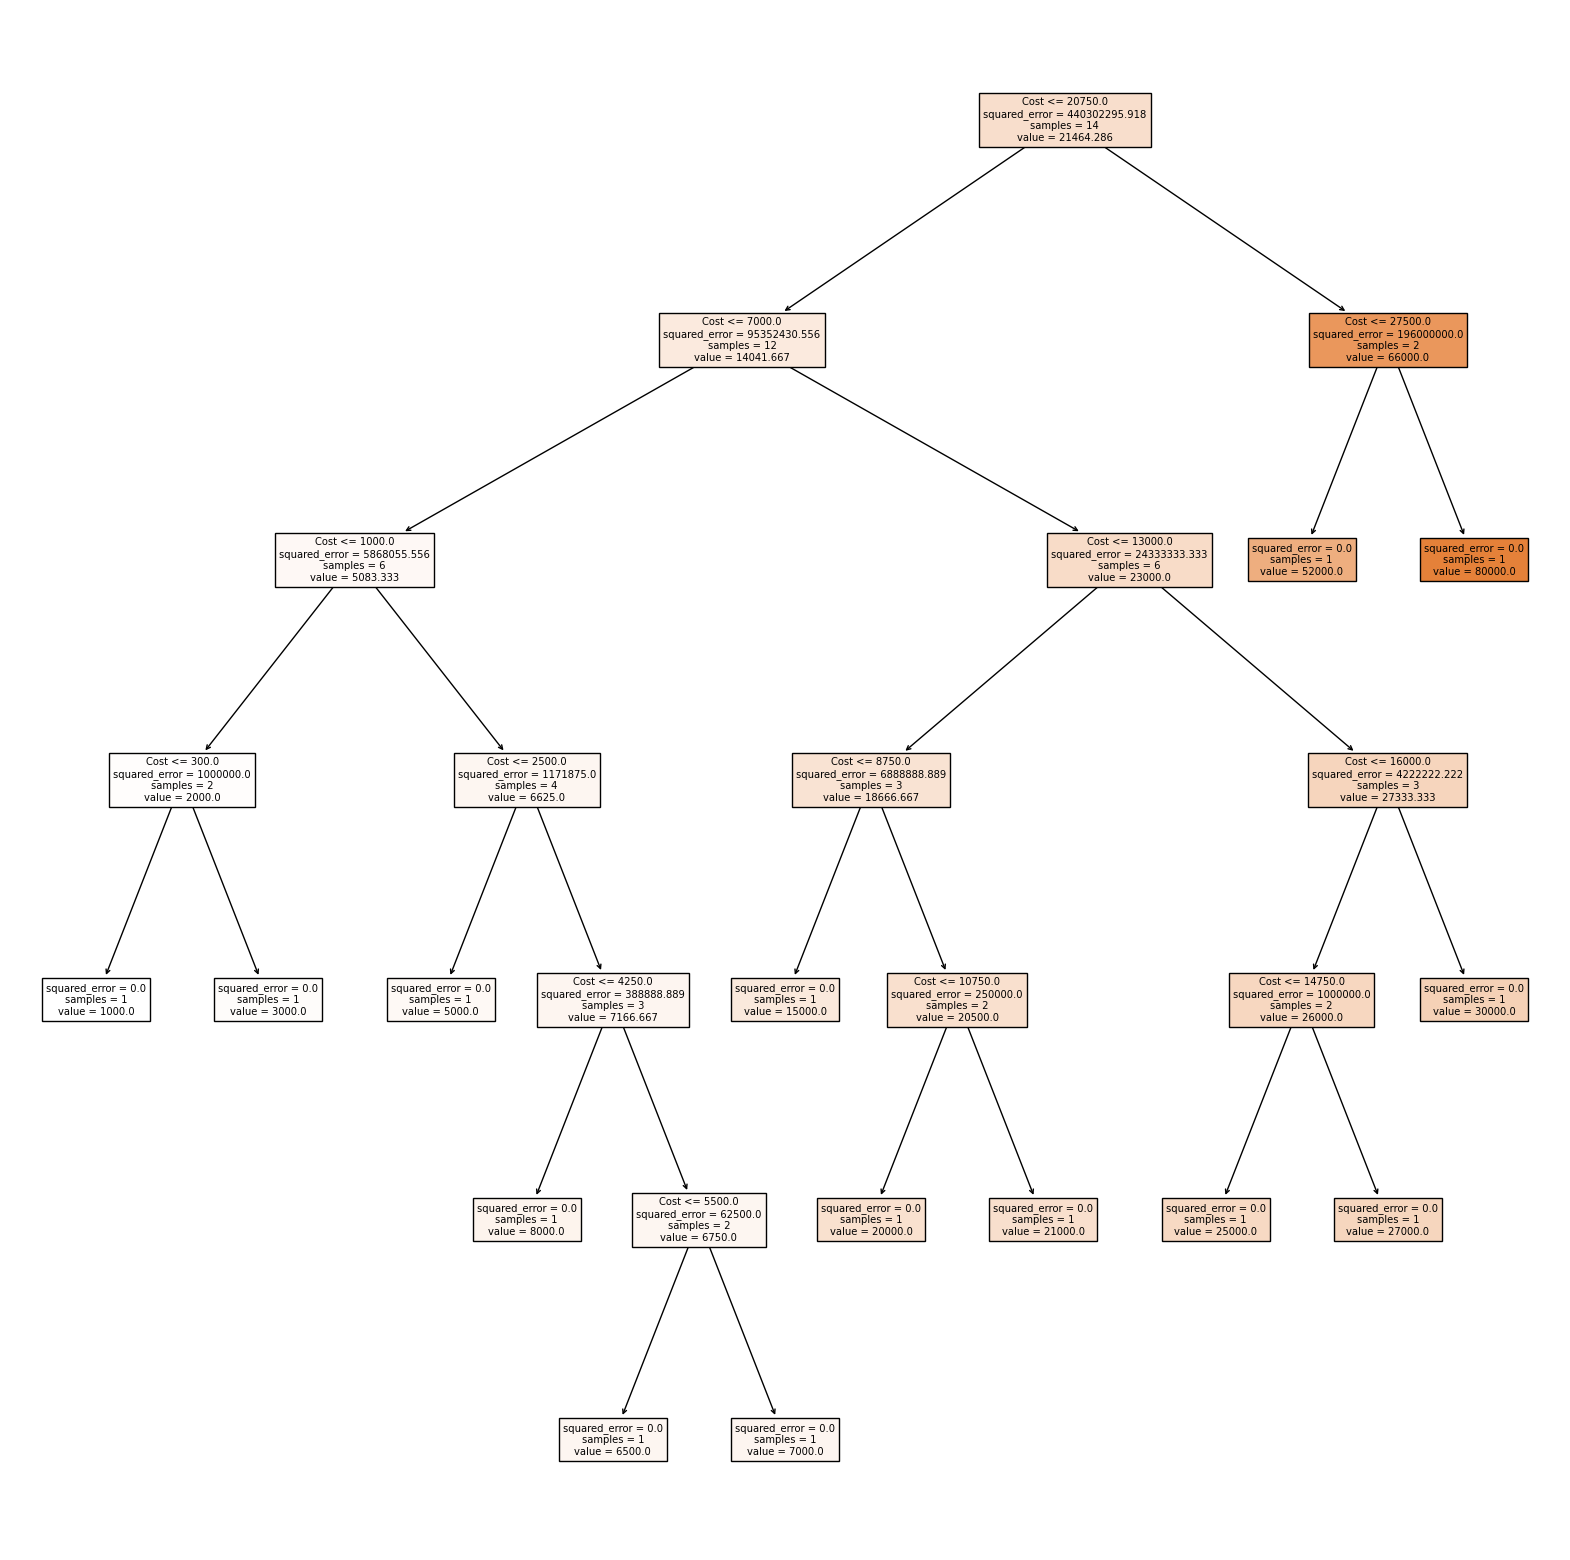

In [43]:
from sklearn import tree
fig = plt.figure(figsize=(20, 20))
_ = tree.plot_tree(my_tree, feature_names=['Cost'], class_names=['Profit'], filled=True)
